Importing required packages and the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

In [2]:
df = pd.read_json("Data/train.json")

In [3]:
#First five elements 
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


Some basic stats regarding the data. 

In [4]:
print("There are ", len(df) , "entries in the training set.")
print("The datatypes of the columns are", type(df["id"][0]), type(df["cuisine"][0]), type(df["ingredients"][0]) )

There are  39774 entries in the training set.
The datatypes of the columns are <class 'numpy.int64'> <class 'str'> <class 'list'>


Let's take a look at the unique cuisines that are present in the data and find the count of each of the cuisines in the train set. 

In [5]:
cuisine_list = df["cuisine"].unique()
print("There are ", len(cuisine_list) , "different cuisines in the dataset which are " , cuisine_list)

There are  20 different cuisines in the dataset which are  ['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian']


In [6]:
cuisine_df = pd.DataFrame(cuisine_list,columns=["cuisine"],index=range(1,len(cuisine_list)+1))
cuisine_df["count"] = cuisine_df["cuisine"].apply(lambda c: sum(df["cuisine"] == c))
cuisine_df["percentage"] = np.round(100*cuisine_df["count"]/len(df),2)

cuisine_df = cuisine_df.sort_values(by=["count"],ascending=False)

cuisine_df

,cuisine,count,percentage
7,italian,7838,19.71
8,mexican,6438,16.19
2,southern_us,4320,10.86
4,indian,3003,7.55
9,chinese,2673,6.72
15,french,2646,6.65
13,cajun_creole,1546,3.89
11,thai,1539,3.87
16,japanese,1423,3.58
1,greek,1175,2.95


Now let's take a look at how many ingredients are present in all the dishes. 

In [7]:
#Make an array with all the ingredients
ingredient_list = set()

for i in range(len(df)):
    ingredient_list = ingredient_list.union(set(df.iloc[i]["ingredients"]))
    
print("In total, there are ", len(ingredient_list), " different ingredients across all dishes.")

In total, there are  6714  different ingredients across all dishes.


Now let's find out what the average number of ingredients for a dish is and do some analysis related to the number of ingredients. 

In [8]:
#Add a column on the number of ingredients
df["ingredient_count"] = df["ingredients"].apply(len)
df["ingredient_count"].describe()

count    39774.000000
mean        10.767713
std          4.428978
min          1.000000
25%          8.000000
50%         10.000000
75%         13.000000
max         65.000000
Name: ingredient_count, dtype: float64

## Distribution of ingredient count across cuisines

Now we plot some histogram to see if the distribution of ingridient_count changes across some of the cuisines. 

<AxesSubplot:xlabel='ingredient_count', ylabel='Count'>

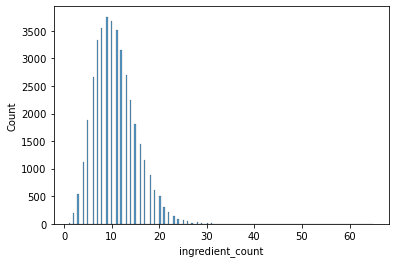

In [9]:
sns.histplot(df,x="ingredient_count")

<AxesSubplot:xlabel='ingredient_count', ylabel='Count'>

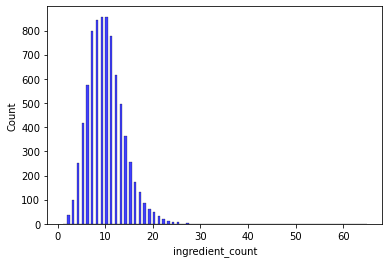

In [10]:
sns.histplot(df[df["cuisine"]=="italian"],x="ingredient_count",color="blue")

<AxesSubplot:xlabel='ingredient_count', ylabel='Count'>

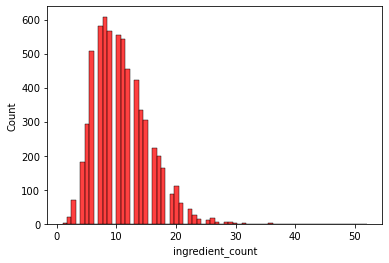

In [11]:
sns.histplot(df[df["cuisine"]=="mexican"],x="ingredient_count",color="red")

<AxesSubplot:xlabel='ingredient_count', ylabel='Count'>

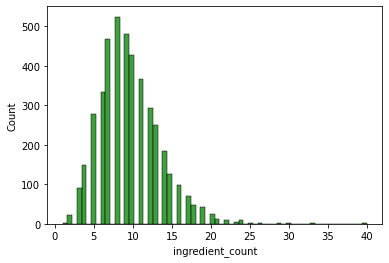

In [12]:
sns.histplot(df[df["cuisine"]=="southern_us"],x="ingredient_count",color="green")

As expected, it seems that the number of ingredients is not a good predictor for the cuisine. But there do seem to be some variations in the distriubution of the number of ingredients, for example, Southern US cuisine is more likely to have fewer than 10 ingredients. 

## Ingredients counts in recipes
We count the times each ingredient occurs in the train data

In [13]:
#For each ingredient and cuisine, find the number of times the ingredient occurs in that cuisine
ingredient_cuisine_count = {(i,c): 0 for i,c in product(ingredient_list,cuisine_list)} #Key = (ingredient,cuisine), value = number of times ingredient occurs in a cuisine recipe

def increment_ingredient_count(cuisine,ingredients): 
    for ing in ingredients:
        ingredient_cuisine_count[(ing,cuisine)] += 1

df.apply(lambda x : increment_ingredient_count(x["cuisine"],x["ingredients"]),axis=1);

In [14]:
#Make a dataframe with the ingredient cuisine count
ingredient_cuisine_count_df = pd.DataFrame(ingredient_list,columns=["ingredient"])

for c in cuisine_list: 
    ingredient_cuisine_count_df[c] = ingredient_cuisine_count_df["ingredient"].apply(lambda x: ingredient_cuisine_count[(x,c)])
    
ingredient_cuisine_count_df["total"] = ingredient_cuisine_count_df.drop(["ingredient"],axis=1).sum(axis=1)

ingredient_cuisine_count_df.sort_values(by="total",axis=0,ascending=False,inplace=True)

In [15]:
ingredient_cuisine_count_df

,ingredient,greek,southern_us,filipino,indian,jamaican,spanish,italian,mexican,chinese,...,vietnamese,cajun_creole,brazilian,french,japanese,irish,korean,moroccan,russian,total
6361,salt,572,2290,421,1934,332,460,3454,2720,907,...,264,743,194,1203,422,376,253,413,288,18049
346,onions,185,482,310,1195,173,253,1240,1493,280,...,105,529,133,368,152,132,208,280,145,7972
4771,olive oil,504,312,48,359,66,387,3111,1289,135,...,38,316,118,516,57,50,36,412,50,7972
4935,water,143,686,310,820,153,158,1052,907,762,...,227,280,87,439,383,96,242,182,111,7457
5770,garlic,216,259,325,726,139,128,1471,1317,763,...,239,370,82,214,166,51,303,143,20,7380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,pot pie,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4797,meat-filled tortellini,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4798,Italian seasoned diced tomatoes,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4799,pareve margarine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [16]:
ingredient_cuisine_count_df["total"].describe()

count     6714.000000
mean        63.788353
std        388.355948
min          1.000000
25%          1.000000
50%          4.000000
75%         20.000000
max      18049.000000
Name: total, dtype: float64

In [17]:
ingredient_cuisine_count_df.head(1000)

,ingredient,greek,southern_us,filipino,indian,jamaican,spanish,italian,mexican,chinese,...,vietnamese,cajun_creole,brazilian,french,japanese,irish,korean,moroccan,russian,total
6361,salt,572,2290,421,1934,332,460,3454,2720,907,...,264,743,194,1203,422,376,253,413,288,18049
346,onions,185,482,310,1195,173,253,1240,1493,280,...,105,529,133,368,152,132,208,280,145,7972
4771,olive oil,504,312,48,359,66,387,3111,1289,135,...,38,316,118,516,57,50,36,412,50,7972
4935,water,143,686,310,820,153,158,1052,907,762,...,227,280,87,439,383,96,242,182,111,7457
5770,garlic,216,259,325,726,139,128,1471,1317,763,...,239,370,82,214,166,51,303,143,20,7380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6381,ground almonds,1,0,0,12,0,3,5,2,0,...,0,0,1,12,0,0,0,6,2,50
5238,rocket leaves,5,2,0,0,0,0,35,3,0,...,0,0,0,2,0,0,0,0,0,49
6171,colby jack cheese,0,4,0,0,0,0,1,44,0,...,0,0,0,0,0,0,0,0,0,49
497,frozen spinach,6,0,0,11,0,1,24,4,1,...,0,1,0,1,0,0,0,0,0,49


If we want to restrict to ~1000 features, a good cutoff would be to pick all ingredients that occur at least 50 times in the train data. 

## Skewed ingredients
We find ingredients that have a highly skewed distribution across cuisines. (Eg, soy sauce for asian cuisines). We say that an ingredient is skewed if it occurs at least 50 times in the data and out of all its occurances, at least 80% happen in a single cuisine. 

In [18]:
## Among all ingredients that occur at least min_times times in the data, 
## find ingredients that occur in a cuisine more than cutoff_percentage% of the time.  
min_times = 50
cutoff_percentage = 80

def isSkewed(row): #Returns True if the ingredient occurs in a skewed sense
    if row["total"] < min_times: 
        return False
    for c in cuisine_list: 
        if row[c] >= row["total"]*cutoff_percentage/100: 
            return True
    return False

ingredient_cuisine_count_df[ingredient_cuisine_count_df.apply(isSkewed,axis=1)]

,ingredient,greek,southern_us,filipino,indian,jamaican,spanish,italian,mexican,chinese,...,vietnamese,cajun_creole,brazilian,french,japanese,irish,korean,moroccan,russian,total
5801,grated parmesan cheese,33,82,1,1,2,6,1580,33,3,...,1,38,12,74,5,4,0,3,0,1886
5956,avocado,6,12,3,2,6,20,25,1044,8,...,11,3,10,3,58,2,1,2,1,1229
2085,corn tortillas,0,1,0,1,1,3,1,946,2,...,0,1,1,0,1,0,5,0,0,965
5526,salsa,0,8,0,2,1,6,8,923,1,...,0,2,7,0,0,1,1,1,0,963
6499,garam masala,0,2,0,862,2,0,1,0,1,...,0,0,1,0,46,0,0,6,0,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,chickpea flour,0,0,0,44,0,1,3,0,0,...,0,0,0,2,0,0,0,1,0,51
3062,spanish chorizo,0,0,0,0,0,41,2,5,0,...,0,1,0,1,0,0,0,0,1,51
3322,kasuri methi,0,0,0,44,0,0,0,0,0,...,0,0,0,0,7,0,0,0,0,51
205,thai green curry paste,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,50


There are roughly 150 skewed ingredients if our cut-off percentage is 80%. 

## Feature selection 
In this section, we cut down the number of features. We only look at those ingredients which occur at least 50 times in the train data. This cuts down the number of featues to ~1000. We then add columns in our data frame associated to these features and export them as a csv file. 

In [19]:
min_times = 50
selected_features = ingredient_cuisine_count_df["ingredient"][ingredient_cuisine_count_df["total"] >= 50].values
selected_features

array(['salt', 'onions', 'olive oil', 'water', 'garlic', 'sugar',
       'garlic cloves', 'butter', 'ground black pepper',
       'all-purpose flour', 'pepper', 'vegetable oil', 'eggs',
       'soy sauce', 'kosher salt', 'green onions', 'tomatoes',
       'large eggs', 'carrots', 'unsalted butter', 'ground cumin',
       'extra-virgin olive oil', 'black pepper', 'milk', 'chili powder',
       'oil', 'red bell pepper', 'purple onion', 'scallions',
       'grated parmesan cheese', 'sesame oil', 'corn starch', 'ginger',
       'baking powder', 'jalapeno chilies', 'dried oregano',
       'chopped cilantro fresh', 'fresh lemon juice', 'diced tomatoes',
       'fresh parsley', 'minced garlic', 'chicken broth', 'sour cream',
       'cayenne pepper', 'brown sugar', 'fresh ginger', 'cooking spray',
       'shallots', 'garlic powder', 'lime', 'lemon juice',
       'fresh lime juice', 'flour', 'honey', 'vanilla extract', 'paprika',
       'chopped onion', 'fish sauce', 'ground cinnamon', 'avocado

In [20]:
## Add a colum for each of these features. 
feature_dict = {}

for feature in selected_features: 
    feature_dict[feature] = df["ingredients"].apply(lambda l: int(feature in l))
    
df = pd.concat([df,pd.DataFrame(feature_dict)],axis=1)
df = df.drop(columns=["ingredients","ingredient_count"]) # Remove list of ingredient as well as the number of ingredients
df

,id,cuisine,salt,onions,olive oil,water,garlic,sugar,garlic cloves,butter,...,fruit,great northern beans,crushed ice,California bay leaves,chicken bouillon granules,thai green curry paste,nonstick spray,plain low-fat yogurt,gari,ground almonds
0,10259,greek,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
## Export file to csv
df.to_csv("Data/train_trimmed.csv",index=False)

Now, we clean the test set also. 

In [22]:
## Cleaning the test set
test_df = pd.read_json("Data/test.json")

feature_dict = {}

for feature in selected_features: 
    feature_dict[feature] = test_df["ingredients"].apply(lambda l: int(feature in l))
    
test_df = pd.concat([test_df,pd.DataFrame(feature_dict)],axis=1)
test_df = test_df.drop(columns=["ingredients"]) # Remove ingredient list
test_df.to_csv("Data/test_trimmed.csv",index=False)